In [1]:
#Please execute this cell
import jupman
from soft import draw_mat, draw_adj, draw_nx
%matplotlib inline

# Relational data 3 - simple statistics

## [Download exercises zip](../_static/generated/relational.zip)

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/relational)

We will now compute and visualize simple statistics about graphs (they don't require node discovery algorithms).

## What to do

- unzip exercises in a folder, you should get something like this: 

```
relational
    relational1-intro.ipynb
    relational1-intro-sol.ipynb
    relational2-binrel.ipynb 
    relational2-binrel-sol.ipynb
    relational3-simple-stats.ipynb
    relational3-simple-stats-sol.ipynb    
    relational4-chal.ipynb
    jupman.py
    soft.py      
```

<div class="alert alert-warning">

**WARNING**: to correctly visualize the notebook, it MUST be in an unzipped folder !
</div>


- open Jupyter Notebook from that folder. Two things should open, first a console and then browser. The browser should show a file list: navigate the list and open the notebook `relational/relational3-simple-stats.ipynb`

<div class="alert alert-warning">

**WARNING 2**: DO NOT use the _Upload_ button in Jupyter, instead navigate in Jupyter browser to the unzipped folder !
</div>


- Go on reading that notebook, and follow instuctions inside.


Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`
- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`
- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`
- If the notebooks look stuck, try to select `Kernel -> Restart`



## Outdegrees and indegrees

The _out-degree_ $\deg^+(v)$ of a node $v$ is the number of edges going out from it, while the _in-degree_ $\deg^-(v)$ is the number of edges going into it. 

_NOTE:_ the out-degree and in-degree are _not_ the sum of weights ! They just count presence or absence of edges.

For example, consider this graph:


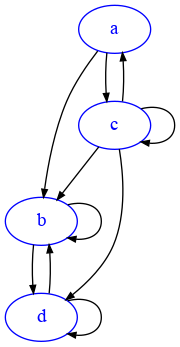

In [2]:
from soft import draw_adj

d = {
    'a' : ['b','c'],  
    'b' : ['b','d'],  
    'c' : ['a','b','c','d'],  
    'd' : ['b','d']   
}


draw_adj(d)

The out-degree of `d` is 2, because it has one outgoing edge to `b` but also an outgoing edge to itself. The indegree of `d` is 3, because it has an edge coming from `b`, one from `c` and one self-loop from `d` itself.

### Exercise - outdegree_adj

✪ RETURN the outdegree of a node from graph `d` represented as a dictionary of adjacency lists
    
- If `v` is not a vertex of `d`, raise `ValueError`

In [3]:
def outdegree_adj(d, v):    
    
    if v not in d:
        raise ValueError("Vertex %s is not in %s" % (v, d))
    
    return len(d[v])
    

try: 
    outdegree_adj({'a':[]},'b')
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"
    
d1 = { 'a':[] }    
assert outdegree_adj(d1,'a') == 0

d2 = { 'a':['a'] }
assert outdegree_adj(d2,'a') == 1

d3 = { 'a':['a','b'],
       'b':[] }
assert outdegree_adj(d3,'a') == 2

d4 = { 'a':['a','b'],
       'b':['a','b','c'],
       'c':[] }
assert outdegree_adj(d4,'b') == 3

In [3]:
def outdegree_adj(d, v):    
    raise Exception('TODO IMPLEMENT ME !')

try: 
    outdegree_adj({'a':[]},'b')
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"
    
d1 = { 'a':[] }    
assert outdegree_adj(d1,'a') == 0

d2 = { 'a':['a'] }
assert outdegree_adj(d2,'a') == 1

d3 = { 'a':['a','b'],
       'b':[] }
assert outdegree_adj(d3,'a') == 2

d4 = { 'a':['a','b'],
       'b':['a','b','c'],
       'c':[] }
assert outdegree_adj(d4,'b') == 3

### Exercise - outdegree_mat

✪✪ RETURN the outdegree of a node `i` from a graph boolean matrix $n$ x $n$ represented as a list of lists
    
- If `i` is not a node of the graph, raise `ValueError`



In [4]:
def outdegree_mat(mat, i):
    
    n = len(mat)
    if i < 0 or i > n: 
        raise ValueError("i %s is not a row of matrix %s" % (i, mat))
    ret = 0    
    for j in range(n):
        if mat[i][j]:
            ret += 1
    return ret
    

try: 
    outdegree_mat([[False]],7)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"

try: 
    outdegree_mat([[False]],-1)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"

m1 = [ [False] ]    
assert outdegree_mat( m1, 0) == 0

m2 = [ [True] ]
assert outdegree_mat( m2, 0) == 1

m3 = [ [True, True],
       [False, False] ]
assert outdegree_mat( m3, 0) == 2

m4 = [ [True, True, False],
       [True, True, True],
       [False, False, False] ]
assert outdegree_mat(m4,1) == 3

In [4]:
def outdegree_mat(mat, i):
    raise Exception('TODO IMPLEMENT ME !')

try: 
    outdegree_mat([[False]],7)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"

try: 
    outdegree_mat([[False]],-1)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"

m1 = [ [False] ]    
assert outdegree_mat( m1, 0) == 0

m2 = [ [True] ]
assert outdegree_mat( m2, 0) == 1

m3 = [ [True, True],
       [False, False] ]
assert outdegree_mat( m3, 0) == 2

m4 = [ [True, True, False],
       [True, True, True],
       [False, False, False] ]
assert outdegree_mat(m4,1) == 3

### Exercise - outdegree_avg

✪✪ RETURN the average outdegree of nodes in graph `d`, represented as dictionary of adjacency lists. 
    
- Assume all nodes are in the keys.



In [5]:
def outdegree_avg(d):
    
    s = 0
    for k in d: 
        s += len(d[k])
    return s / len(d)
    
    
d1 = { 'a':[] }    
assert outdegree_avg(d1) == 0

d2 = { 'a':['a'] }
assert round( outdegree_avg(d2), 2) == 1.00 / 1.00

d3 = { 'a':['a','b'],
       'b':[] }
assert round( outdegree_avg(d3), 2) == (2 + 0) / 2

d4 = { 'a':['a','b'],
       'b':['a','b','c'],
       'c':[] }
assert round( outdegree_avg(d4), 2) == round( (2 + 3) / 3 , 2)

In [5]:
def outdegree_avg(d):
    raise Exception('TODO IMPLEMENT ME !')
    
d1 = { 'a':[] }    
assert outdegree_avg(d1) == 0

d2 = { 'a':['a'] }
assert round( outdegree_avg(d2), 2) == 1.00 / 1.00

d3 = { 'a':['a','b'],
       'b':[] }
assert round( outdegree_avg(d3), 2) == (2 + 0) / 2

d4 = { 'a':['a','b'],
       'b':['a','b','c'],
       'c':[] }
assert round( outdegree_avg(d4), 2) == round( (2 + 3) / 3 , 2)

### Exercise - indegree_adj

The indegree of a node `v` is the number of edges going into it. 

✪✪  RETURN the indegree of node `v` in graph `d`, represented as a dictionary of adjacency lists
    
- If `v` is not a node of the graph, raise `ValueError`

In [6]:
def indegree_adj(d, v):
    
    if v not in d:
        raise ValueError("Vertex %s is not in %s" % (v, d))
    ret = 0
    for k in d:
        if v in d[k]:
            ret += 1
    return ret
    
    
try: 
    indegree_adj({'a':[]},'b')
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"

d1 = { 'a':[] }
assert indegree_adj(d1,'a') == 0

d2 = {'a':['a']}
assert indegree_adj(d2,'a') == 1

d3 = { 'a':['a','b'],
       'b':[]}
assert indegree_adj(d3, 'a') == 1

d4 = { 'a':['a','b'],
       'b':['a','b','c'],
       'c':[]}
assert indegree_adj(d4, 'b') == 2

In [6]:
def indegree_adj(d, v):
    raise Exception('TODO IMPLEMENT ME !')
    
try: 
    indegree_adj({'a':[]},'b')
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"

d1 = { 'a':[] }
assert indegree_adj(d1,'a') == 0

d2 = {'a':['a']}
assert indegree_adj(d2,'a') == 1

d3 = { 'a':['a','b'],
       'b':[]}
assert indegree_adj(d3, 'a') == 1

d4 = { 'a':['a','b'],
       'b':['a','b','c'],
       'c':[]}
assert indegree_adj(d4, 'b') == 2

### Exercise - indegree_mat

✪✪ RETURN the indegree of a node `i` from a graph boolean matrix nxn represented as a list of lists
    
- If `i` is not a node of the graph, raise `ValueError`

In [7]:
def indegree_mat(mat, i):
    
    n = len(mat)
    if i < 0 or i > n: 
        raise ValueError("i %s is not a row of matrix %s" % (i, mat))
    ret = 0    
    for k in range(n):
        if mat[k][i]:
            ret += 1
    return ret
    

try: 
    indegree_mat([[False]],7)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"
    
assert indegree_mat(
        [
            [False]
        ]
,0) == 0

m1 = [ [True] ]
assert indegree_mat(m1, 0) == 1

m2 = [ [True, True],
       [False, False] ]
assert indegree_mat(m2, 0) == 1

m3 = [ [True, True, False],
       [True, True, True],
       [False, False, False] ]
assert indegree_mat( m3, 1) == 2

In [7]:
def indegree_mat(mat, i):
    raise Exception('TODO IMPLEMENT ME !')

try: 
    indegree_mat([[False]],7)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"
    
assert indegree_mat(
        [
            [False]
        ]
,0) == 0

m1 = [ [True] ]
assert indegree_mat(m1, 0) == 1

m2 = [ [True, True],
       [False, False] ]
assert indegree_mat(m2, 0) == 1

m3 = [ [True, True, False],
       [True, True, True],
       [False, False, False] ]
assert indegree_mat( m3, 1) == 2

### Exercise -  indegree_avg

✪✪ RETURN the average indegree of nodes in graph `d`, represented as dictionary of adjacency lists. 
    
- Assume all nodes are in the keys


In [8]:
def indegree_avg(d):
    
    s = 0
    for k in d: 
        s += len(d[k])
    return s / len(d)
    
    
d1 = { 'a':[] }    
assert indegree_avg(d1) == 0

d2 = { 'a':['a'] }
assert round( indegree_avg(d2), 2) == 1.00 / 1.00

d3 = { 'a':['a','b'],
       'b':[]}
assert round( indegree_avg(d3), 2) == (1 + 1) / 2

d4 = { 'a':['a','b'],
       'b':['a','b','c'],
       'c':[]}
assert round( indegree_avg(d4), 2) == round( (2 + 2 + 1) / 3 , 2)

In [8]:
def indegree_avg(d):
    raise Exception('TODO IMPLEMENT ME !')
    
d1 = { 'a':[] }    
assert indegree_avg(d1) == 0

d2 = { 'a':['a'] }
assert round( indegree_avg(d2), 2) == 1.00 / 1.00

d3 = { 'a':['a','b'],
       'b':[]}
assert round( indegree_avg(d3), 2) == (1 + 1) / 2

d4 = { 'a':['a','b'],
       'b':['a','b','c'],
       'c':[]}
assert round( indegree_avg(d4), 2) == round( (2 + 2 + 1) / 3 , 2)

### Was it worth it?

**QUESTION**: Is there any difference between the results of `indegree_avg` and `outdegree_avg` ?

**ANSWER**: They give the same result. Think about what you did: for `outdegree_avg` you summed over all rows and then divided by `n`. For `indegree_avg` you summed over all columns, and then divided by `n`. 


More formally, we have that the so-called _degree sum formula_ holds (see [Wikipedia](https://en.wikipedia.org/wiki/Directed_graph#Indegree_and_outdegree) for more info):


$\sum_{v \in V} \deg^-(v) = \sum_{v \in V} \deg^+(v) = |A|$

### networkx Indegrees and outdegrees 

With Networkx we can easily calculate indegrees and outdegrees of a node:


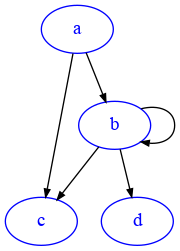

In [9]:

import networkx as nx

# notice with networkx if nodes are already referenced to in an adjacency list 
# you do not need to put them as keys:

G=nx.DiGraph({
    'a':['b','c'],        # node a links to b and c
    'b':['b','c', 'd']    # node b links to b itself, c and d
})

draw_nx(G)

In [10]:
G.out_degree('a')

2

**QUESTION**: What is the outdegree of `'b'` ? Try to think about it and then confirm your thoughts with networkx:

In [11]:
# write here
#print("indegree  b:  %s" % G.in_degree('b'))
#print("outdegree b:  %s" % G.out_degree('b'))

In [11]:
# write here



**QUESTION**: We defined _indegree_ and _outdegree_. Can you guess what the _degree_ might be ? In particular, for a self pointing node like `'b'`, what could it be? Try to use `G.degree('b')` methods to validate your thoughts.

In [12]:
# write here
#print("degree  b:  %s" % G.degree('b'))

In [12]:
# write here



**ANSWER**: it is the sum of indegree and outdegree. In presence of a self-loop like for `'b'`, we count the self-loop twice, once as outgoing edge and one as incident edge

In [13]:
# write here
#G.degree('b')

In [13]:
# write here



## Visualizing distributions

We will try to study the distributions visually. Let's take an example networkx DiGraph: 

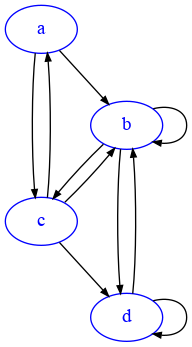

In [14]:
import networkx as nx

G1=nx.DiGraph({
    'a':['b','c'],        
    'b':['b','c', 'd'],
    'c':['a','b','d'], 
    'd':['b', 'd']
})

draw_nx(G1)

## indegree per node

✪✪ Display a plot for graph `G` where the xtick labels are the nodes, and the y is the indegree of those nodes.

**Note:** instead of `xticks` you might directly use [categorical variables](https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html) IF you have matplotlib >= 2.1.0

Here we use `xticks` as sometimes you might need to fiddle with them anyway

Expected result:

![expected-indegree-per-node-dots.png](img/expected-indegree-per-node-dots.png)


To get the nodes, you can use the `G1.nodes()` function:

In [15]:
G1.nodes()

NodeView(('a', 'b', 'c', 'd'))

It gives back a `NodeView` which is not a list, but still you can iterate through it with a `for in` cycle:

In [16]:
for n in G1.nodes():
    print(n)

a
b
c
d


Also, you can get the indegree of a node with 

In [17]:
G1.in_degree('b')

4

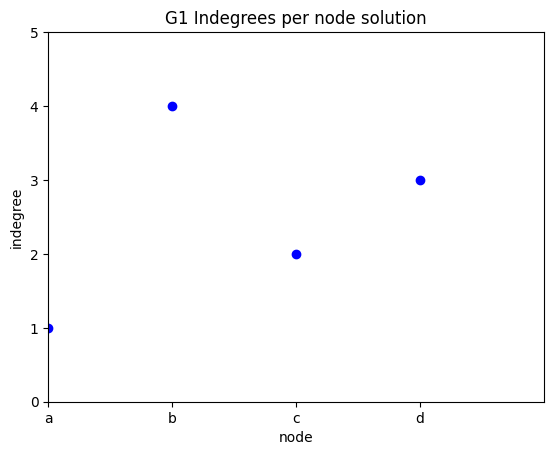

In [18]:

# write here

import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(G1.number_of_nodes())
ys_in = [G1.in_degree(n) for n in G1.nodes() ]

plt.plot(xs, ys_in,  'bo')

plt.ylim(0,max(ys_in) + 1)
plt.xlim(0,max(xs) + 1)

plt.title("G1 Indegrees per node solution")

plt.xticks(xs, G1.nodes())

plt.xlabel('node')
plt.ylabel('indegree')



plt.show()

In [18]:

# write here



### indegree per node bar plot

The previous plot with dots doesn't look so good - we might try to use instead a bar plot. First look at [this example](https://en.softpython.org/visualization/visualization1-sol.html#Bar-plots), then proceed with the exercise 

✪✪ Display a [bar plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html) for graph `G1` where the xtick labels are the nodes, and the y is the indegree of those nodes.

Expected result:

![expected-indegree-per-node.png](img/expected-indegree-per-node.png)

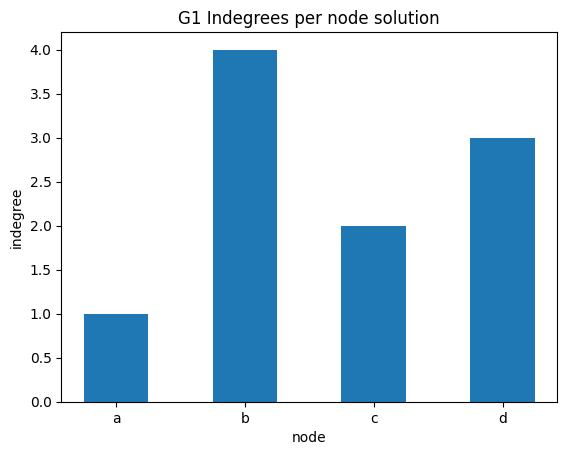

In [19]:

# write here

import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(G1.number_of_nodes())
ys_in = [G1.in_degree(n) for n in G1.nodes() ]

plt.bar(xs, ys_in, 0.5, align='center')

plt.title("G1 Indegrees per node solution")
plt.xticks(xs, G1.nodes())

plt.xlabel('node')
plt.ylabel('indegree')


plt.show()

In [19]:

# write here



### indegree per node sorted alphabetically

✪✪ Display the same bar plot as before, but now sort nodes alphabetically. 

**NOTE**: you cannot  run `.sort()` method on the result given by  `G1.nodes()`, because nodes in network by default have no inherent order. To use `.sort()` you need first to convert the result to a `list` object.

You should get something like this:

![expected-indegree-per-node-sorted-labels.png](img/expected-indegree-per-node-sorted-labels.png)

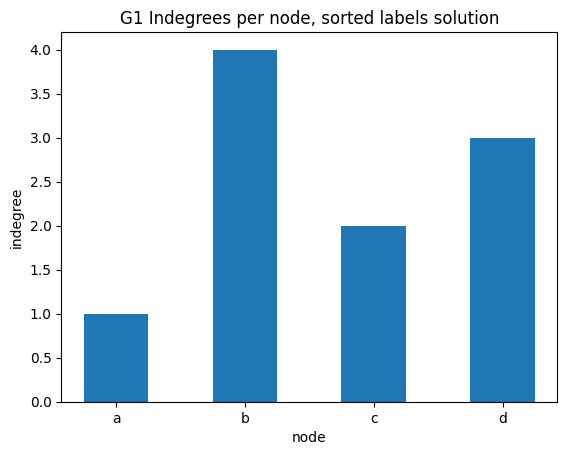

In [20]:

# write here

import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(G1.number_of_nodes())

xs_labels = list(G1.nodes())

xs_labels.sort()

ys_in = [G1.in_degree(n) for n in xs_labels ]

plt.bar(xs, ys_in, 0.5, align='center')

plt.title("G1 Indegrees per node, sorted labels solution")
plt.xticks(xs, xs_labels)

plt.xlabel('node')
plt.ylabel('indegree')


plt.show()

In [20]:

# write here



In [21]:
# write here


### indegree per node sorted

✪✪✪ Display the same bar plot as before, but now sort nodes according to their indegree. This is more challenging, to  do it you need to use some sort trick. 

* **HINT**: first read the [Python documentation](https://docs.python.org/3/howto/sorting.html#key-functions)

Expected result:

![expected-indegree-per-node-sorted-indegree.png](img/expected-indegree-per-node-sorted-indegree.png)

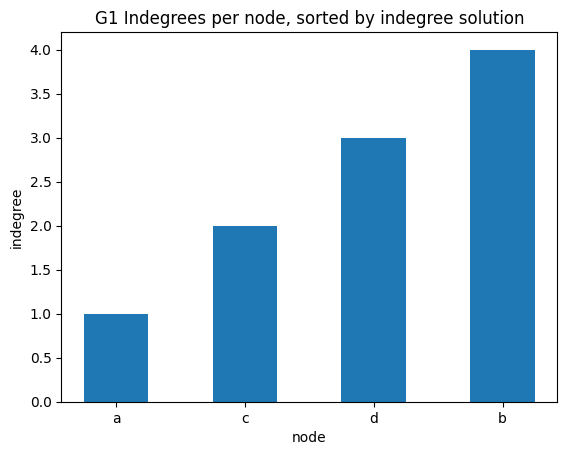

In [22]:

# write here

import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(G1.number_of_nodes())

coords = [(v, G1.in_degree(v)) for v in G1.nodes() ]

coords.sort(key=lambda c: c[1])

ys_in = [c[1] for c in coords]

plt.bar(xs, ys_in, 0.5, align='center')

plt.title("G1 Indegrees per node, sorted by indegree solution")
plt.xticks(xs, [c[0] for c in coords])

plt.xlabel('node')
plt.ylabel('indegree')


plt.show()

In [22]:

# write here




### out degrees per node sorted

✪✪✪ Do the same graph as before for the outdegrees.

Expected result:

![expected-outdegrees-per-node-sorted.png](img/expected-outdegrees-per-node-sorted.png)

You can get the outdegree of a node with:

In [23]:
G1.out_degree('b')

3

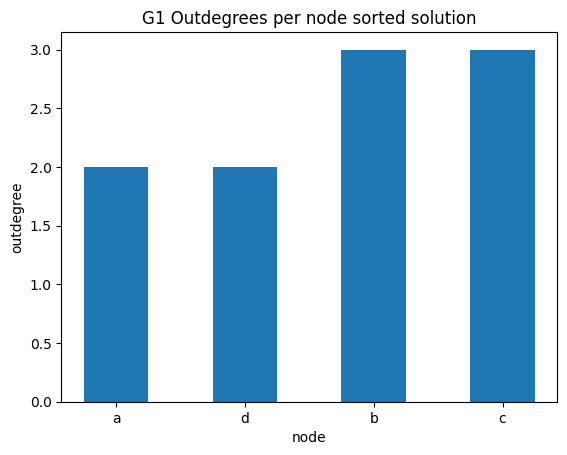

In [24]:

# write here
import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(G1.number_of_nodes())

coords = [(v, G1.out_degree(v)) for v in G1.nodes() ]

coords.sort(key=lambda c: c[1])

ys_out = [c[1] for c in coords]

plt.bar(xs, ys_out, 0.5, align='center')

plt.title("G1 Outdegrees per node sorted solution")
plt.xticks(xs, [c[0] for c in coords])

plt.xlabel('node')
plt.ylabel('outdegree')



plt.show()

In [24]:

# write here



### degrees per node

✪✪✪ We might check as well the sorted degrees per node, intended as the sum of in_degree and out_degree. To get the sum, use `G1.degree(node)` function.

Expected result:

![expected-degrees-per-node.png](img/expected-degrees-per-node.png)

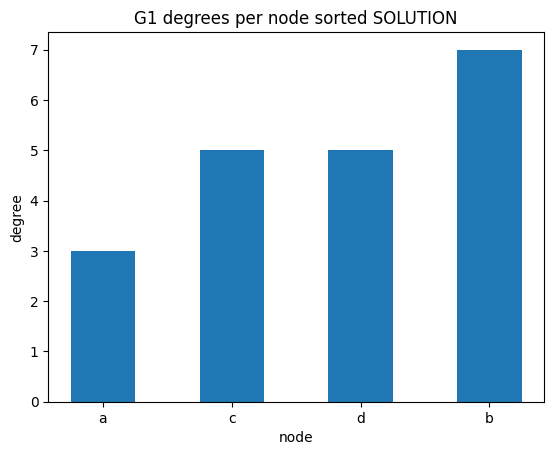

In [25]:

# write here

import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(G1.number_of_nodes())

coords = [(v, G1.degree(v)) for v in G1.nodes() ]

coords.sort(key=lambda c: c[1])

ys_deg = [c[1] for c in coords]

plt.bar(xs, ys_deg, 0.5, align='center')

plt.title("G1 degrees per node sorted SOLUTION")
plt.xticks(xs, [c[0] for c in coords])

plt.xlabel('node')
plt.ylabel('degree')


plt.show()

In [25]:

# write here



### In out degrees per node

✪✪✪✪ Look at [this example](https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py), and make a double bar chart sorting nodes by their _total_ degree. To do so, in the tuples you will need `vertex`, `in_degree`, `out_degree` and also `degree`.

![expected-inout-per-node.png](img/expected-inout-per-node.png)

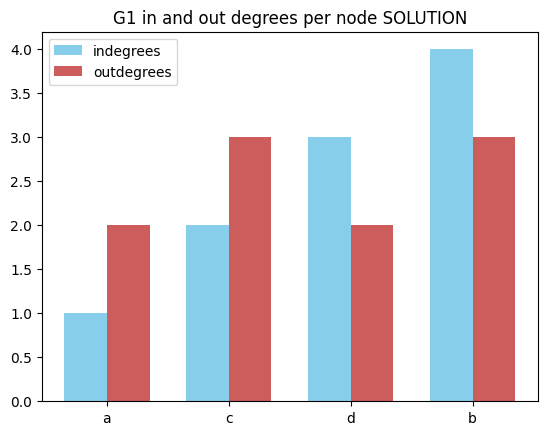

In [26]:

# write here

import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(G1.number_of_nodes())

coords = [(v, G1.degree(v), G1.in_degree(v), G1.out_degree(v) ) for v in G1.nodes() ]

coords.sort(key=lambda c: c[1])

ys_deg = [c[1] for c in coords]
ys_in = [c[2] for c in coords]
ys_out = [c[3] for c in coords]


width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(xs - width/2, ys_in, width, 
                color='SkyBlue', label='indegrees')
rects2 = ax.bar(xs + width/2, ys_out, width,
                color='IndianRed', label='outdegrees')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('G1 in and out degrees per node SOLUTION')
ax.set_xticks(xs)
ax.set_xticklabels([c[0] for c in coords])
ax.legend()



plt.show()

In [26]:

# write here



## Frequency histogram

Now let's try drawing degree frequencies: for each degree present in the graph we want to display a bar as high as the number of times that particular degree appears.

For doing so, we will need a matplot histogram, see [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)

We will need to tell matplotlib how many columns we want, which in histogram terms are called _bins_. We also need to give the histogram a series of numbers so it can count how many times each number occurs. Let's consider this graph `G2`:

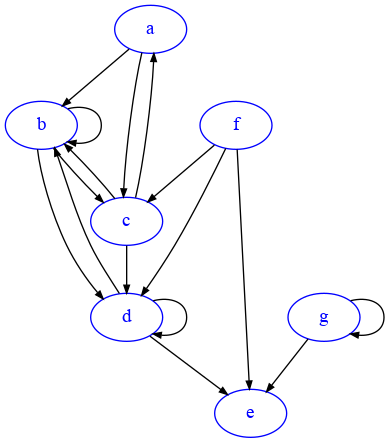

In [27]:
import networkx as nx

G2=nx.DiGraph({
    'a':['b','c'],        
    'b':['b','c', 'd'],
    'c':['a','b','d'], 
    'd':['b', 'd','e'],
    'e':[],
    'f':['c','d','e'],
    'g':['e','g']
})


draw_nx(G2)


If we take the degree sequence of `G2` we get this:

In [28]:
degrees_G2 = [G2.degree(n) for n in G2.nodes()]

degrees_G2

[3, 7, 6, 7, 3, 3, 3]

We see `3` appears four times, `6` once, and `7` twice. 

Let's find a good number for the bins. First we can check the boundaries our x axis should have:

In [29]:
min(degrees_G2)

3

In [30]:
max(degrees_G2)

7

So on the x axis our histogram must go at least from `3` and at least to `7`. If we want integer columns (bins), we will need at least ticks for going from `3` included to `7` included, that is at least ticks for  `3,4,5,6,7`. For precise display, when we have integer x it's best to also manually provide the sequence of bin edges, remembering it should start at least from the minimum _included_ (in our case, `3`) and arrive to the `maximum + 1` _included_ (in our case, `7 + 1 = 8`)

**NOTE**: precise histogram drawing can be quite tricky, please do read [this StackOverflow post](https://stackoverflow.com/a/27084005) for more details about it.

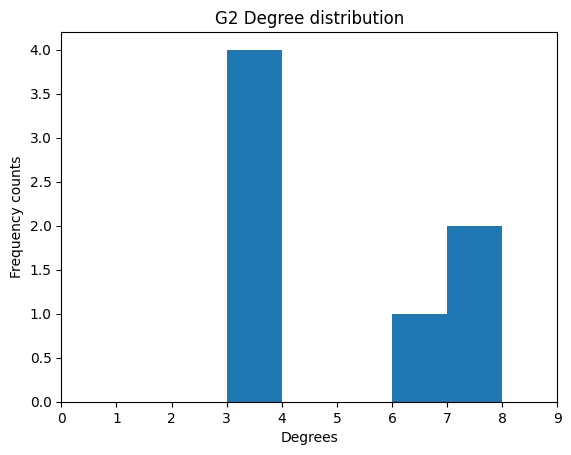

In [31]:

import matplotlib.pyplot as plt
import numpy as np

degrees = [G2.degree(n) for n in G2.nodes()]

# add histogram

# in this case hist returns a tuple of three values
# we put in three variables
n, bins, columns = plt.hist(degrees_G2, 
                            bins=range(3,9), # 3 *included*, 4,5,6,7,8 *included* 
                            width=1.0)       # graphical bars width 

plt.xlabel('Degrees')
plt.ylabel('Frequency counts')
plt.title('G2 Degree distribution')
plt.xlim(0, max(degrees) + 2)
plt.show()

As expected, we see `3` is counted four times, `6` once, and `7` twice. 

### Exercise - better histogram display

✪✪✪  Still, it would be visually better to align the x ticks to the  middle of the bars with `xticks`, and also to make the graph tighter by setting the `xlim` appropriately. This is not always easy to do. 

Read carefully [this StackOverflow post](https://stackoverflow.com/a/27084005) and try doing it by yourself.

**NOTE**: set _one thing at a time_  and try if it works(i.e. first `xticks` and then `xlim`), doing everything at once might get quite confusing.

Expected result:

![freq-hist.png](img/expected-freq-hist.png)

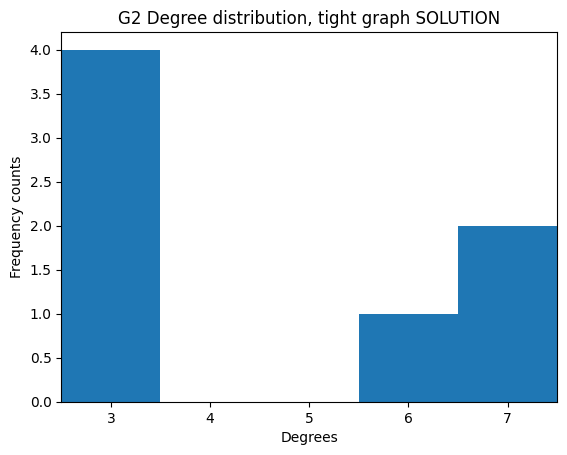

In [32]:
# write here

import matplotlib.pyplot as plt
import numpy as np

degrees = [G2.degree(n) for n in G2.nodes()]

# add histogram

min_x = min(degrees)      # 3
max_x = max(degrees)      # 7
bar_width = 1.0

# in this case hist returns a tuple of three values
# we put in three variables
n, bins, columns = plt.hist(
    degrees_G2, 
    bins= range(3,9), # 3 *included* to  9 *excluded*
                      # it's like the xs, but with one number more !!                                                                
                      # to understand why read this
                      # https://stackoverflow.com/questions/27083051/matplotlib-xticks-not-lining-up-with-histogram/27084005#27084005
    width=bar_width)  #  graphical width of the bars

plt.xlabel('Degrees')
plt.ylabel('Frequency counts')
plt.title('G2 Degree distribution, tight graph SOLUTION')


xs = np.arange(min_x,max_x + 1)  # 3 *included* to 8 *excluded* 
                                 # used numpy so we can later reuse it for float vector operations 

plt.xticks(xs + bar_width / 2,  # position of ticks
           xs )                 # labels of ticks
plt.xlim(min_x, max_x + 1)  #  3 *included* to 8 *excluded* 



plt.show()

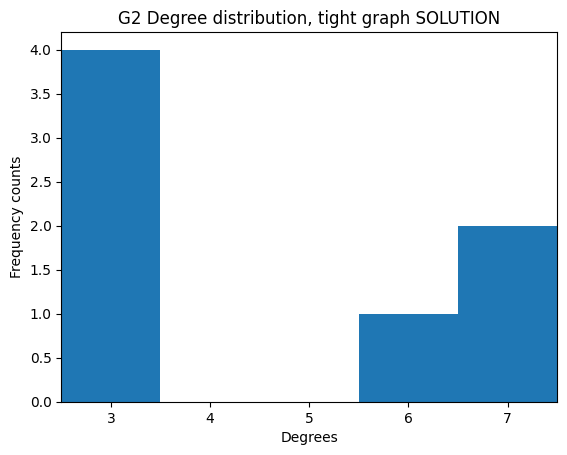

In [32]:
# write here



## Graph models

Let's study frequencies of some known network types.

### Exercise - Erdős–Rényi model

✪✪ A simple graph model we can think of is the so-called [Erdős–Rényi model](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model): it's an _undirected_ graph where have `n` nodes, and each node is connected to each other with probability `p`. In networkx, we can generate a random one by issuing this command:

In [33]:
G = nx.erdos_renyi_graph(10, 0.5)

In the drawing, the absence of arrows confirms it's undirected:

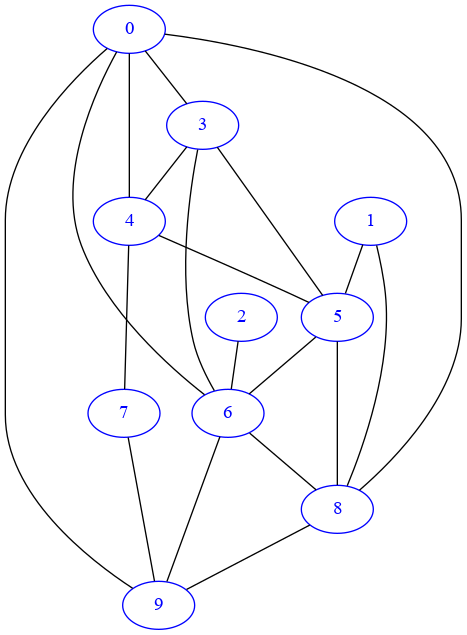

In [34]:
draw_nx(G)

Try plotting degree distribution for different values of `p` (`0.1`, `0.5`, `0.9`) with a fixed `n=1000`, putting them side by side on the same row. What does their distribution look like ? Where are they centered ? 

* to put them side by side, look [at this example](https://en.softpython.org/visualization/visualization1-sol.html#Showing-plots-side-by-side)
* to avoid rewriting the same code again and again, define a `plot_erdos(n,p,j)` function to be called three times.

Expected result:

![expected-erdos-renyi.png](img/expected-erdos-renyi.png)


                            Erdős–Rényi degree distribution SOLUTION


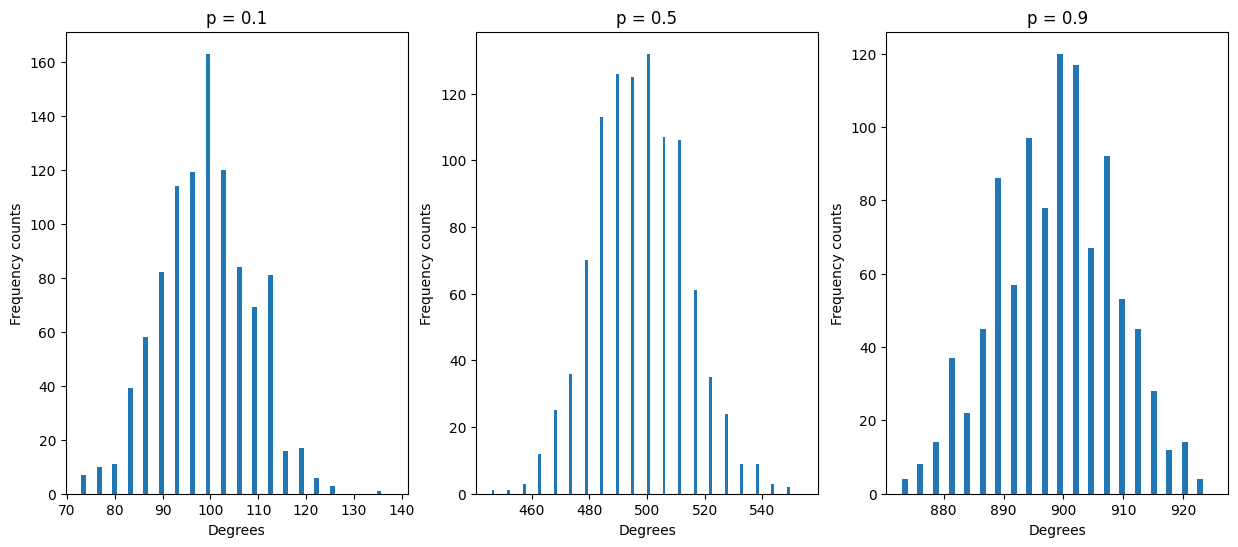

In [35]:

# write here

import matplotlib.pyplot as plt
import numpy as np

def plot_erdos(n, p, j):
    G = nx.erdos_renyi_graph(n, p)
    
    plt.subplot(1,   # 1 row
                3,   # 3 columns
                j)   # plotting in jth cell
    
    degrees = [G.degree(n) for n in G.nodes()]
    num_bins = 20   
        
    n, bins, columns = plt.hist(degrees, num_bins,  width=1.0)

    plt.xlabel('Degrees')
    plt.ylabel('Frequency counts')
    plt.title('p = %s' % p)

n = 1000

fig = plt.figure(figsize=(15,6))  # width: 10 inches, height 3 inches

plot_erdos(n, 0.1, 1)
plot_erdos(n, 0.5, 2)
plot_erdos(n, 0.9, 3)

print()
print("                            Erdős–Rényi degree distribution SOLUTION")



plt.show()

In [35]:

# write here



## Continue

Go on with the [challenges](https://en.softpython.org/relational/relational4-chal.html)